In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv("/content/BMW_Car_Sales_Classification.csv")

In [4]:
yearly_sales = df.groupby("Year")["Sales_Volume"].sum().reset_index()
X = yearly_sales["Sales_Volume"]

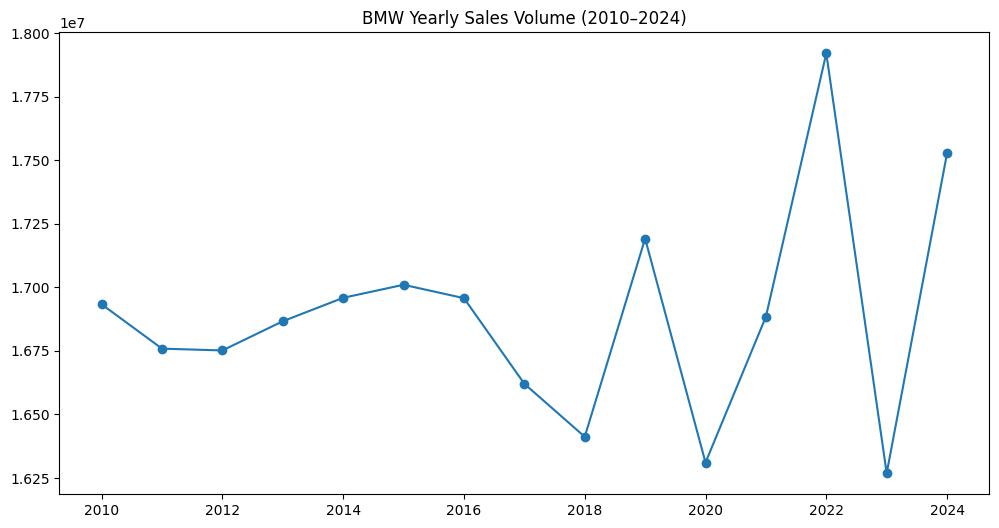

In [5]:
plt.figure(figsize=(12,6))
plt.plot(yearly_sales["Year"], X, marker="o")
plt.title("BMW Yearly Sales Volume (2010–2024)")
plt.show()


In [6]:
result = adfuller(X)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.6486309294156847
p-value: 0.4577545332048244


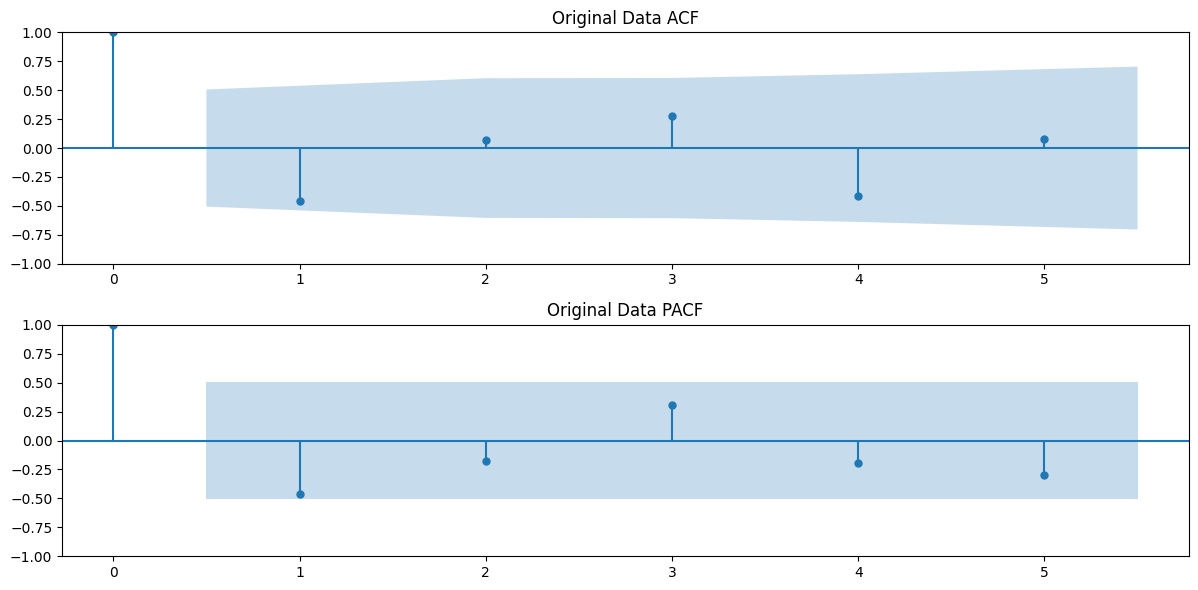

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plot_acf(X, lags=5, ax=plt.gca())
plt.title("Original Data ACF")
plt.subplot(2,1,2)
plot_pacf(X, lags=5, ax=plt.gca())
plt.title("Original Data PACF")
plt.tight_layout()
plt.show()


In [10]:

# Fit ARMA(1,1) Model
arma11_model = ARIMA(X, order=(1, 0, 1)).fit()
print("ARMA(1,1) Summary:\n", arma11_model.summary())


ARMA(1,1) Summary:
                                SARIMAX Results                                
Dep. Variable:           Sales_Volume   No. Observations:                   15
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -213.680
Date:                Mon, 22 Sep 2025   AIC                            435.360
Time:                        16:46:09   BIC                            438.192
Sample:                             0   HQIC                           435.330
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.689e+07   1.21e+05    139.287      0.000    1.67e+07    1.71e+07
ar.L1         -0.3565      0.617     -0.577      0.564      -1.567       0.854
ma.L1         -0.1821      0.647

In [11]:
# Simulate ARMA(1,1) process
phi1 = arma11_model.params['ar.L1']
theta1 = arma11_model.params['ma.L1']
ar1 = np.array([1, -phi1])
ma1 = np.array([1, theta1])
arma11_sim = ArmaProcess(ar1, ma1).generate_sample(nsample=200)

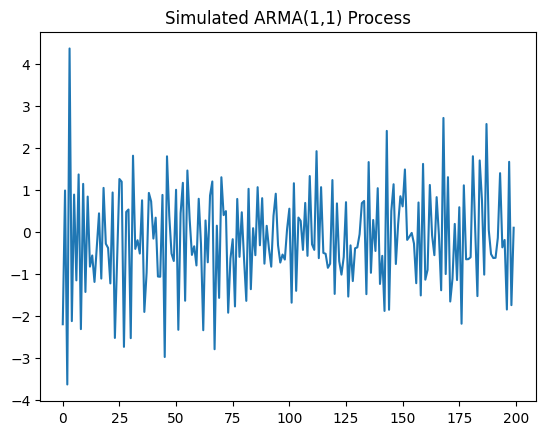

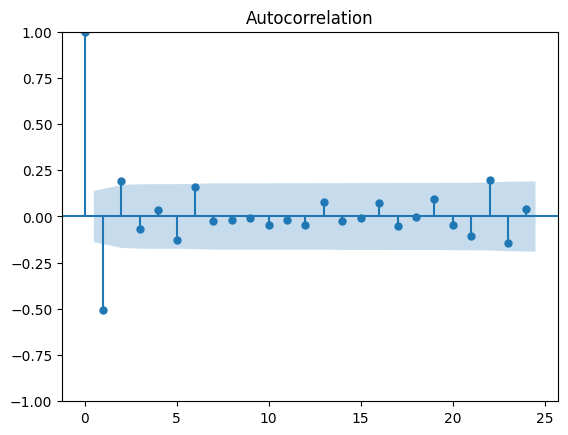

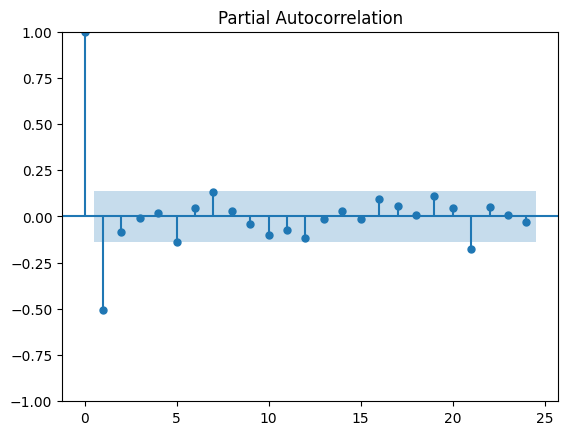

In [12]:
plt.plot(arma11_sim)
plt.title("Simulated ARMA(1,1) Process")
plt.show()
plot_acf(arma11_sim)
plt.show()
plot_pacf(arma11_sim)
plt.show()

In [13]:
# Fit ARMA(2,2) Model
arma22_model = ARIMA(X, order=(2, 0, 2)).fit()
print("ARMA(2,2) Summary:\n", arma22_model.summary())


ARMA(2,2) Summary:
                                SARIMAX Results                                
Dep. Variable:           Sales_Volume   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -213.895
Date:                Mon, 22 Sep 2025   AIC                            439.789
Time:                        16:46:47   BIC                            444.038
Sample:                             0   HQIC                           439.744
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.689e+07      2e+05     84.578      0.000    1.65e+07    1.73e+07
ar.L1         -1.2968      1.136     -1.142      0.254      -3.523       0.929
ar.L2         -0.7205      2.892

In [14]:
# Simulate ARMA(2,2) process
phi1 = arma22_model.params['ar.L1']
phi2 = arma22_model.params['ar.L2']
theta1 = arma22_model.params['ma.L1']
theta2 = arma22_model.params['ma.L2']
ar2 = np.array([1, -phi1, -phi2])
ma2 = np.array([1, theta1, theta2])
arma22_sim = ArmaProcess(ar2, ma2).generate_sample(nsample=200)

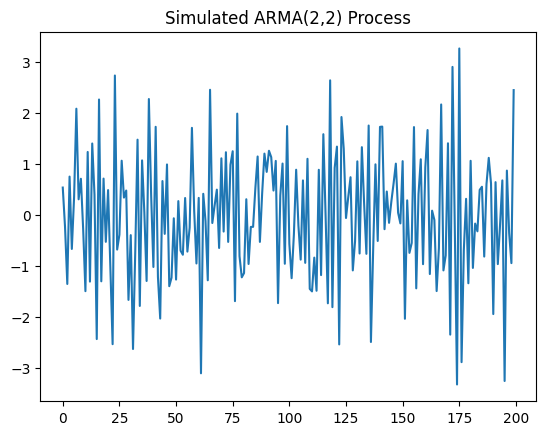

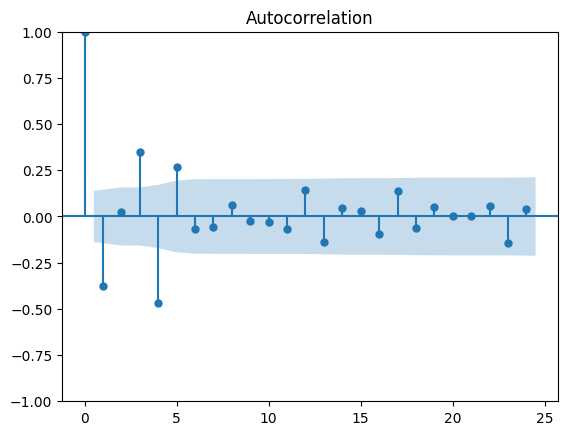

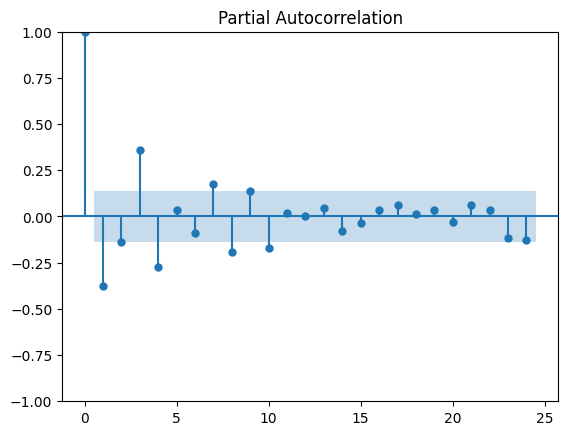

In [15]:
plt.plot(arma22_sim)
plt.title("Simulated ARMA(2,2) Process")
plt.show()
plot_acf(arma22_sim)
plt.show()
plot_pacf(arma22_sim)
plt.show()